Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Modül A (Tür Tanıma) ve Modül B (Sağlık Analizi) yüklendi

📸 Lütfen bir bitki fotoğrafı yükleyin


Saving Ekran görüntüsü 2026-01-10 165351.png to Ekran görüntüsü 2026-01-10 165351 (1).png

🌿 PLANT CARE AI SONUÇ
----------------------------------------
Bitki Türü    : Aloe Vera (0.81)
Sağlık Durumu : Uncertain anomaly (requires expert review) (0.63)


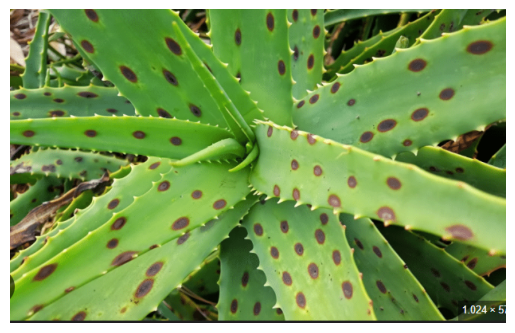

In [13]:
# ================================
# PLANT CARE AI - TEK HÜCRE DEMO
# ================================

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import drive, files

# 1️⃣ Drive bağla
drive.mount("/content/drive")

# 2️⃣ Model yolları
BASE_DIR = "/content/drive/MyDrive/PLANT_CARE_AI"

MODEL_A_PATH = f"{BASE_DIR}/modul_A_guclu_efficientnet.keras"
MODEL_B_PATH = f"{BASE_DIR}/moduleB_anomaly_FINAL.keras"

# 3️⃣ Modelleri yükle
model_A = tf.keras.models.load_model(MODEL_A_PATH)
model_B = tf.keras.models.load_model(MODEL_B_PATH)

print("✅ Modül A (Tür Tanıma) ve Modül B (Sağlık Analizi) yüklendi")

# 4️⃣ Tür sınıfları (MODEL A)
PLANT_CLASSES = [
"African Violet (Saintpaulia ionantha)",
"Aloe Vera",
"Anthurium (Anthurium andraeanum)",
"Areca Palm (Dypsis lutescens)",
"Asparagus Fern (Asparagus setaceus)",
"Begonia (Begonia spp.)",
"Bird of Paradise (Strelitzia reginae)",
"Birds Nest Fern (Asplenium nidus)",
"Boston Fern (Nephrolepis exaltata)",
"Calathea",
"Cast Iron Plant (Aspidistra elatior)",
"Chinese Money Plant (Pilea peperomioides)",
"Chinese evergreen (Aglaonema)",
"Christmas Cactus (Schlumbergera bridgesii)",
"Chrysanthemum",
"Ctenanthe",
"Daffodils (Narcissus spp.)",
"Dracaena",
"Dumb Cane (Dieffenbachia spp.)",
"Elephant Ear (Alocasia spp.)",
"English Ivy (Hedera helix)",
"Hyacinth (Hyacinthus orientalis)",
"Iron Cross begonia (Begonia masoniana)",
"Jade plant (Crassula ovata)",
"Kalanchoe",
"Lilium (Hemerocallis)",
"Lily of the valley (Convallaria majalis)",
"Money Tree (Pachira aquatica)",
"Monstera Deliciosa (Monstera deliciosa)",
"Orchid",
"Parlor Palm (Chamaedorea elegans)",
"Peace lily",
"Poinsettia (Euphorbia pulcherrima)",
"Polka Dot Plant (Hypoestes phyllostachya)",
"Ponytail Palm (Beaucarnea recurvata)",
"Pothos (Ivy arum)",
"Prayer Plant (Maranta leuconeura)",
"Rattlesnake Plant (Calathea lancifolia)",
"Rubber Plant (Ficus elastica)",
"Sago Palm (Cycas revoluta)",
"Schefflera",
"Snake plant (Sanseviera)",
"Tradescantia",
"Tulip",
"Venus Flytrap",
"Yucca",
"ZZ Plant (Zamioculcas zamiifolia)"
]

# 5️⃣ Sağlık sınıfları (MODEL B)
HEALTH_CLASSES = ["Healthy", "Mold_like", "Spots", "Yellowing"]

# 6️⃣ Kullanıcıdan foto yükle
print("\n📸 Lütfen bir bitki fotoğrafı yükleyin")
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# 7️⃣ Görüntü ön işleme
IMG_SIZE = (224, 224)

img = Image.open(image_path).convert("RGB")
img_resized = img.resize(IMG_SIZE)
from tensorflow.keras.applications.efficientnet import preprocess_input
img_array = preprocess_input(np.array(img_resized))
img_tensor = np.expand_dims(img_array, axis=0)

# 8️⃣ Tür tahmini (Modül A)
pred_A = model_A.predict(img_tensor, verbose=0)
plant_idx = np.argmax(pred_A)
plant_name = PLANT_CLASSES[plant_idx]
plant_conf = np.max(pred_A)

# 9️⃣ Sağlık tahmini (Modül B)
pred_B = model_B.predict(img_tensor, verbose=0)
health_idx = np.argmax(pred_B)
health_name = HEALTH_CLASSES[health_idx]
health_conf = np.max(pred_B)

# Akıllı sağlık yorumu (yanlış pozitifleri azaltmak için)
if health_name != "Healthy" and health_conf < 0.85:
    health_name = "Uncertain anomaly (requires expert review)"

# Tür-bağımlı yanlış pozitif bastırma
if plant_name == "Aloe Vera" and health_name == "Mold_like":
    health_name = "Likely natural leaf texture (no clear disease)"



# 🔟 Sonuçları göster
plt.imshow(img)
plt.axis("off")

print("\n🌿 PLANT CARE AI SONUÇ")
print("-" * 40)
print(f"Bitki Türü    : {plant_name} ({plant_conf:.2f})")
print(f"Sağlık Durumu : {health_name} ({health_conf:.2f})")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
📦 Modeller yükleniyor...
✅ Modeller başarıyla yüklendi

📸 Lütfen bir bitki fotoğrafı seçin:


Saving Ekran görüntüsü 2026-01-10 165503.png to Ekran görüntüsü 2026-01-10 165503.png

🌿 PLANT CARE AI SONUÇ
---------------------------------------------
🪴 Bitki Türü    : Aloe Vera (%100.0)
🩺 Sağlık Durumu : Belirsiz sağlık durumu (uzman incelemesi önerilir)
---------------------------------------------


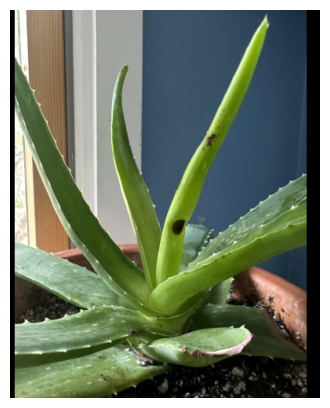

In [11]:
# =========================================
# 🌿 PLANT CARE AI - DEMO (TEK HÜCRE)
# =========================================

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import drive, files
from tensorflow.keras.applications.efficientnet import preprocess_input

# -----------------------------------------
# 1️⃣ DRIVE BAĞLANTI
# -----------------------------------------
drive.mount("/content/drive")

# -----------------------------------------
# 2️⃣ MODEL YOLLARI
# -----------------------------------------
BASE_DIR = "/content/drive/MyDrive/PLANT_CARE_AI"

MODEL_A_PATH = f"{BASE_DIR}/modul_A_guclu_efficientnet.keras"
MODEL_B_PATH = f"{BASE_DIR}/moduleB_anomaly_FINAL.keras"

print("📦 Modeller yükleniyor...")

model_A = tf.keras.models.load_model(MODEL_A_PATH)
model_B = tf.keras.models.load_model(MODEL_B_PATH)

print("✅ Modeller başarıyla yüklendi")

# -----------------------------------------
# 3️⃣ SINIF LİSTELERİ (MODELLE UYUMLU)
# -----------------------------------------

PLANT_CLASSES = [
    "African Violet (Saintpaulia ionantha)",
    "Aloe Vera",
    "Anthurium (Anthurium andraeanum)",
    "Areca Palm (Dypsis lutescens)",
    "Asparagus Fern (Asparagus setaceus)",
    "Begonia (Begonia spp.)",
    "Bird of Paradise (Strelitzia reginae)",
    "Birds Nest Fern (Asplenium nidus)",
    "Boston Fern (Nephrolepis exaltata)",
    "Calathea",
    "Cast Iron Plant (Aspidistra elatior)",
    "Chinese Money Plant (Pilea peperomioides)",
    "Chinese evergreen (Aglaonema)",
    "Christmas Cactus (Schlumbergera bridgesii)",
    "Chrysanthemum",
    "Ctenanthe",
    "Daffodils (Narcissus spp.)",
    "Dracaena",
    "Dumb Cane (Dieffenbachia spp.)",
    "Elephant Ear (Alocasia spp.)",
    "English Ivy (Hedera helix)",
    "Hyacinth (Hyacinthus orientalis)",
    "Iron Cross begonia (Begonia masoniana)",
    "Jade plant (Crassula ovata)",
    "Kalanchoe",
    "Lilium (Hemerocallis)",
    "Lily of the valley (Convallaria majalis)",
    "Money Tree (Pachira aquatica)",
    "Monstera Deliciosa (Monstera deliciosa)",
    "Orchid",
    "Parlor Palm (Chamaedorea elegans)",
    "Peace lily",
    "Poinsettia (Euphorbia pulcherrima)",
    "Polka Dot Plant (Hypoestes phyllostachya)",
    "Ponytail Palm (Beaucarnea recurvata)",
    "Pothos (Ivy arum)",
    "Prayer Plant (Maranta leuconeura)",
    "Rattlesnake Plant (Calathea lancifolia)",
    "Rubber Plant (Ficus elastica)",
    "Sago Palm (Cycas revoluta)",
    "Schefflera",
    "Snake plant (Sansevieria)",
    "Tradescantia",
    "Tulip",
    "Venus Flytrap",
    "Yucca",
    "ZZ Plant (Zamioculcas zamiifolia)"
]

HEALTH_CLASSES = ["Healthy", "Mold_like", "Spots", "Yellowing"]

# -----------------------------------------
# 4️⃣ FOTOĞRAF YÜKLEME
# -----------------------------------------
print("\n📸 Lütfen bir bitki fotoğrafı seçin:")
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# -----------------------------------------
# 5️⃣ GÖRÜNTÜ ÖN İŞLEME
# -----------------------------------------
IMG_SIZE = (224, 224)

img = Image.open(image_path).convert("RGB")
img_resized = img.resize(IMG_SIZE)
img_array = preprocess_input(np.array(img_resized))
img_tensor = np.expand_dims(img_array, axis=0)

# -----------------------------------------
# 6️⃣ MODÜL A - TÜR TAHMİNİ (CONFIDENCE KONTROLLÜ)
# -----------------------------------------
pred_A = model_A.predict(img_tensor, verbose=0)[0]
plant_idx = int(np.argmax(pred_A))
plant_conf = float(pred_A[plant_idx])

if plant_idx < len(PLANT_CLASSES):
    plant_name = PLANT_CLASSES[plant_idx]
else:
    plant_name = "Unknown plant"

if plant_conf < 0.65:
    plant_result = "Tür tespiti belirsiz (uzman incelemesi önerilir)"
else:
    plant_result = f"{plant_name} (%{plant_conf*100:.1f})"

# -----------------------------------------
# 7️⃣ MODÜL B - SAĞLIK TAHMİNİ (AKILLI YORUM)
# -----------------------------------------
pred_B = model_B.predict(img_tensor, verbose=0)[0]
health_idx = int(np.argmax(pred_B))
health_conf = float(pred_B[health_idx])
raw_health = HEALTH_CLASSES[health_idx]

if raw_health == "Healthy" and health_conf >= 0.75:
    health_result = "Sağlıklı"
elif health_conf < 0.85:
    health_result = "Belirsiz sağlık durumu (uzman incelemesi önerilir)"
else:
    health_map_tr = {
        "Mold_like": "Küf benzeri semptom",
        "Spots": "Yaprak lekelenmesi",
        "Yellowing": "Sararma belirtisi"
    }
    health_result = health_map_tr.get(raw_health, "Belirsiz semptom")

# -----------------------------------------
# 8️⃣ SONUÇLARI GÖSTER
# -----------------------------------------
plt.figure(figsize=(4,6))
plt.imshow(img)
plt.axis("off")

print("\n🌿 PLANT CARE AI SONUÇ")
print("-" * 45)
print(f"🪴 Bitki Türü    : {plant_result}")
print(f"🩺 Sağlık Durumu : {health_result}")
print("-" * 45)
